# Image Classification using Multi-layer Neural Network - MNIST database

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used in the field of machine learning. It consists of 60,000 training images and 10,000 images for testing.The images of the dataset are 28x28 pixels. A full description of the dataset is described [here](https://en.wikipedia.org/wiki/MNIST_database).

The goals of this tutorial are:

- Illustrate the use of multi-layer neural networks to image classification problems.
- Develop a full application (train, validation, and test).

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import numpy as np

Using TensorFlow backend.


## Loading train and test sets

In [2]:
#Loading the data using keras utility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Printing the shape of the train and test sets
print x_train.shape
print x_test.shape

(60000, 28, 28)
(10000, 28, 28)


## Displaying train set

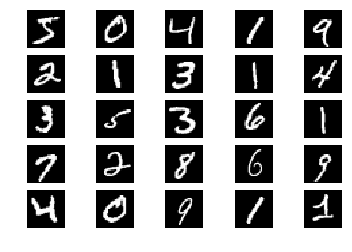

In [3]:
#Displaying a few samples of the training set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_train[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Displaying test set

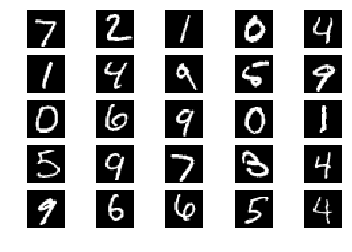

In [4]:
#Displaying a few samples of the test set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_test[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Normalizing the data

In [5]:
#Setting training parameters
batch_size = 128
num_classes = 10
epochs = 20

#Normalizing data between 0 and 1
x_train = x_train.reshape(60000, 784) #784 = 28*28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Defining the model

In [6]:
#Defining the Neural Network architecture
def my_model():
    inputs = Input(shape=(784,))
    out1 = Dense(512, activation='relu')(inputs)
    out2 = Dropout(0.2)(out1)
    out3 = Dense(512, activation='relu')(out2)
    out4 = Dropout(0.2)(out3)
    out5 = Dense(10, activation='softmax')(out4)
    model = Model(inputs=inputs, outputs=out5)
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

## Model summary 

In [7]:
#Building the model and showing a summary
model = my_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Training

In [8]:
# Checkpoint callback to save model after each improvement along the epochs
checkpoint = ModelCheckpoint('mnist_keras.model', monitor='val_loss'
                             ,verbose=0,save_weights_only= True,
                             save_best_only=True)

#Training the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split= 0.2,callbacks = [checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s - loss: 0.2737 - acc: 0.9171 - val_loss: 0.1338 - val_acc: 0.9591
Epoch 2/20
48000/48000 [==============================] - 1s - loss: 0.1119 - acc: 0.9659 - val_loss: 0.1199 - val_acc: 0.9631
Epoch 3/20
48000/48000 [==============================] - 1s - loss: 0.0780 - acc: 0.9763 - val_loss: 0.0911 - val_acc: 0.9744
Epoch 4/20
48000/48000 [==============================] - 1s - loss: 0.0603 - acc: 0.9818 - val_loss: 0.0823 - val_acc: 0.9783
Epoch 5/20
48000/48000 [==============================] - 0s - loss: 0.0511 - acc: 0.9846 - val_loss: 0.0980 - val_acc: 0.9754
Epoch 6/20
48000/48000 [==============================] - 0s - loss: 0.0435 - acc: 0.9870 - val_loss: 0.0925 - val_acc: 0.9786
Epoch 7/20
48000/48000 [==============================] - 1s - loss: 0.0378 - acc: 0.9889 - val_loss: 0.0952 - val_acc: 0.9793
Epoch 8/20
48000/48000 [==============================] - 1s 

## Train and validation error curve

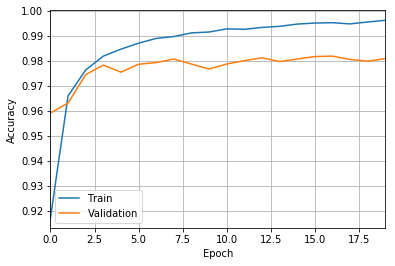

In [9]:
#Plot accuracy history
plt.plot(history.history['acc'], label = "Train")
plt.plot(history.history['val_acc'],label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

## Loading best model and evaluating it

In [10]:
#Load the best_model during training
best_model = my_model()
best_model.load_weights('mnist_keras.model')

#Evaluate the model on the test set
score = best_model.evaluate(x_test, y_test, verbose=0)
print 'Test loss: %f' %score[0]
print 'Test accuracy: %f' %score[1]

Test loss: 0.070166
Test accuracy: 0.981200


## Displaying some prediction errors

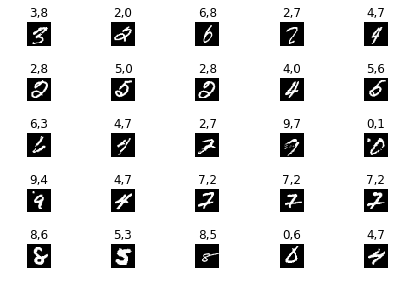

In [11]:
# Run predicition
ypred = best_model.predict(x_test).argmax(axis = 1)
y_test2 = y_test.argmax(axis = 1)

# See samples where prediction failed
indexes = np.where(ypred!=y_test2)[0][::-1]

#Display some of the errors
x_test = x_test.reshape(-1,28,28)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(x_test[aux], cmap = 'gray')
        col.axis("off")
        col.set_title("%d,%d" %(y_test2[aux],ypred[aux]))
        counter+=1
plt.show()

## Displaying some weights vectors as images

(784, 512)


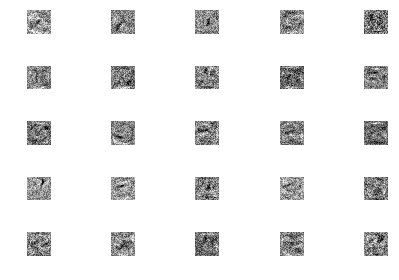

In [12]:
weights, biases = best_model.layers[1].get_weights()
print weights.shape
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(weights[:,-counter].reshape(28,28), cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Activity suggestions

- Try to improve the result in the test set by testing other architectures.